# SMA analysis
Purpose: find best representation of SMA such that there is little correlation with actual price

| Indicator | corr-matrix-score | Domain ([] if strict, else approximate) | Notes |
| --- | :---: | :---: | --- |
| log_rate_sma_50 | -0.30 | `-4, 4` | More correlation than rate_sma_50 which in domain -20, 20 sometimes goes up to 100+|
| sma_close_50 | 0.22 | `0.8, 1.3` | Need to check if log sma close is better than sma close |
| log_sma_close_50 | 0.22 | `[0, 0.25` | Identical corr-matrix-score to rate_sma_20 |
|sma_diff_d_close_50| -0.22| `-0.3, 0.3` | Many other options but unsure if adding little variation helps |
| log_sma_close_200 | 0.18 | `[0, 0.5` | There are much more variations with 20, etc, do double check |
| log_rate_sma_20 | -0.14 | `-5, 5` | Identical corr-matrix-score to rate_sma_20 |
| log_rate_sma_200 | -0.08 | `-4, 4` | Identical corr-matrix_score to rate_sma_200|

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.trend import SMAIndicator
from ctarget import get_target
import useful_functions as uf

ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv("../data/BTCUSDT-hour-target-classification.csv")

In [7]:
# Simple moving indicator
def get_sma(p=[20, 50, 200], get_diff=True, get_rate=True):
    """
    adds sma indicators to df
    p is period, recommended is [20, 50, 200]
    """
    for i in p:
        sma = SMAIndicator(close=df["close"], window=i)
        name = "sma_" + str(i)
        df[name]=sma.sma_indicator()
    if get_diff:
        get_sma_diff(p)
    if get_rate:
        get_sma_rate(p)

In [8]:
# Simple moving indicator difference from close
def get_sma_diff(p=[20, 50, 200]):
    """
    adds sma-close
    """
    for i in p:
        c = df["close"]
        sma = SMAIndicator(close=c, window=i)
        s = sma.sma_indicator()
        result = list(map(lambda x, y: x - y, c, s))
        name = "sma_diff_" + str(i)
        df[name] = result

In [9]:
# SMA rate
def get_sma_rate(p=[20, 50, 200]):
    """
    adds sma rate by taking difference: close-previous_close (for SMAs)
    """
    for i in p:
        sma = SMAIndicator(close=df["close"], window=i)
        now = sma.sma_indicator()
        past = now.shift(1)
        name = "rate_sma_" + str(i)
        df[name] = list(map(none_subtraction, now, past))
        
def none_subtraction(x, y):
    """
    returns x-y and None if either are None
    """
    if x is None or y is None:
        return None
    else:
        return x-y

In [10]:
get_sma()

In [64]:
# fig,ax = plt.subplots(figsize=(20, 10))
# ax.plot(df.timestamp,
#         df.sma_50,
#         color="green")
# ax.set_xlabel("time")
# ax.set_ylabel("target")

# ax.tick_params(labelbottom=False)    
# ax.axes.xaxis.set_visible(False)

# ax2=ax.twinx()
# ax2.plot(df.timestamp,
#          df["rs-diff-20"],
#          color="lightgreen")
# ax2.axhline(y=0, color='darkgreen', linestyle='-')

# ax3=ax.twinx()
# ax3.plot(df.timestamp,
#          df.sma_diff_50,
#          color="gray")

# ax4=ax.twinx()
# ax4.plot(df.timestamp,
#          df.close,
#          color="black")

# ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
# plt.show()

In [65]:
wanted = list(df.columns)[94:]
wanted.append("target")
wanted

['sma_20',
 'sma_50',
 'sma_200',
 'sma_diff_20',
 'sma_diff_50',
 'sma_diff_200',
 'rate_sma_20',
 'rate_sma_50',
 'rate_sma_200',
 'target']

In [66]:
# Difference between SMA difference and rate of SMA
# - Keep only one of rsd or srd because they're opposites

df["rsd_200"] = list(map(lambda x, y: uf.log_abs(x-y),df["rate_sma_200"], df["sma_diff_200"]))
df["rsd_50"] = list(map(lambda x, y: uf.log_abs(x-y),df["rate_sma_50"], df["sma_diff_50"]))
df["rsd_20"] = list(map(lambda x, y: uf.log_abs(x-y),df["rate_sma_20"], df["sma_diff_20"]))

In [67]:
df["rsd_200_r"] = uf.get_rate(df["rsd_200"])
df["rsd_50_r"] = uf.get_rate(df["rsd_200"])
df["rsd_20_r"] = uf.get_rate(df["rsd_200"])

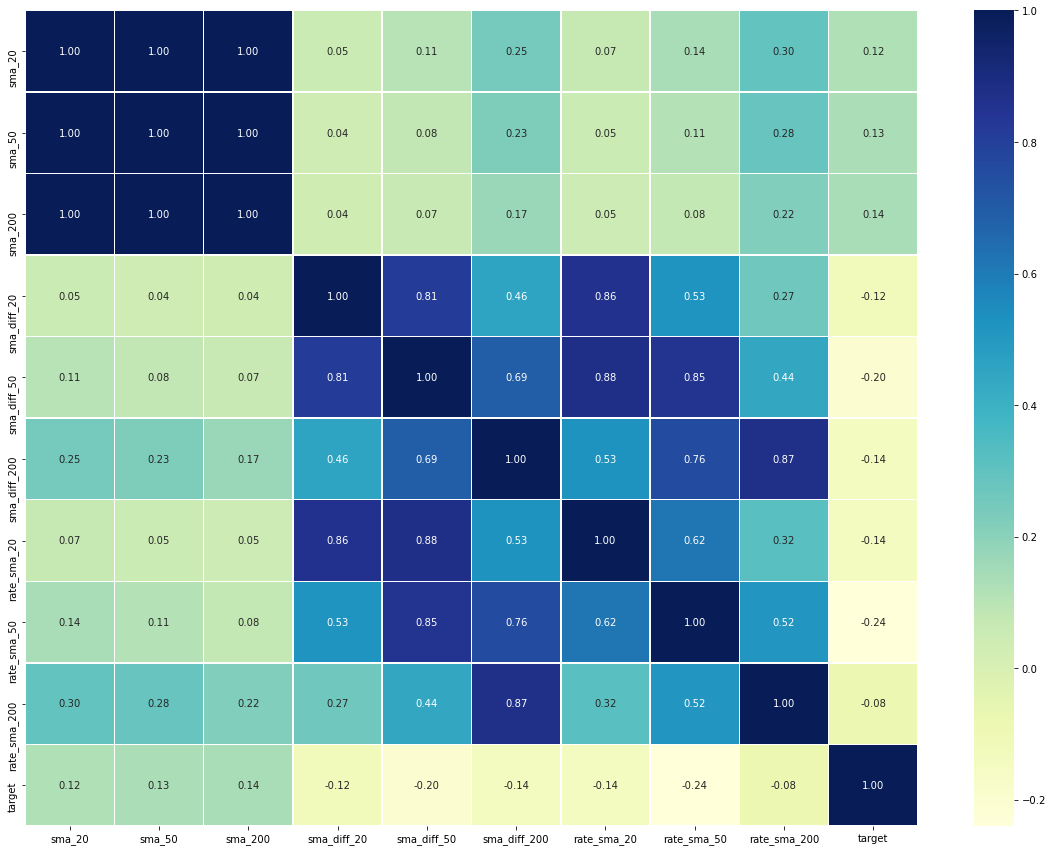

In [68]:
# Make a correlation matrix

# d = df.drop(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
#        'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore'], axis=1)

# d["target"] = get_target(df, span=200, cutoff_at=0.65)

d = df[list(wanted)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
# fig.savefig('corr-matrix.png')

## log-rate-sma-X and rate-sma-X

In [74]:
# Instiantiation
dplot = df.copy()
dplot["log_rate_sma_50"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.rate_sma_50))
dplot["log_rate_sma_20"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.rate_sma_20))
dplot["log_rate_sma_200"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.rate_sma_200))

# dplot["target"] = get_target(df, span=200, cutoff_at=0.65)

In [80]:
dp = dplot[30000:40000]

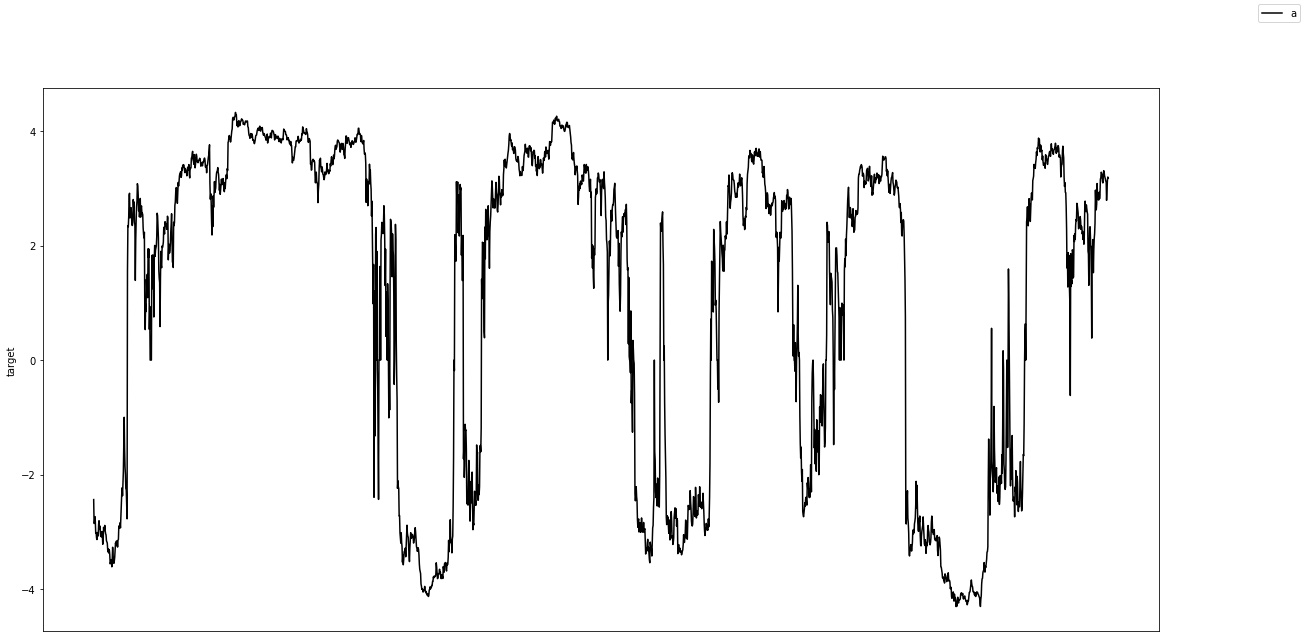

In [81]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(dp.timestamp,
        dp.log_rate_sma_200,
        color="black")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

# ax2=ax.twinx()
# ax2.plot(dp.timestamp,
#          dp.close,
#          color="green")
# # ax2.axhline(y=0, color='darkgreen', linestyle='-')
# ax2.set_ylabel("close")

fig.legend(["a", "b", "c", "d"])
plt.show()

#### Correlation matrix for rate_sma_X and log_rate_sma_X with target

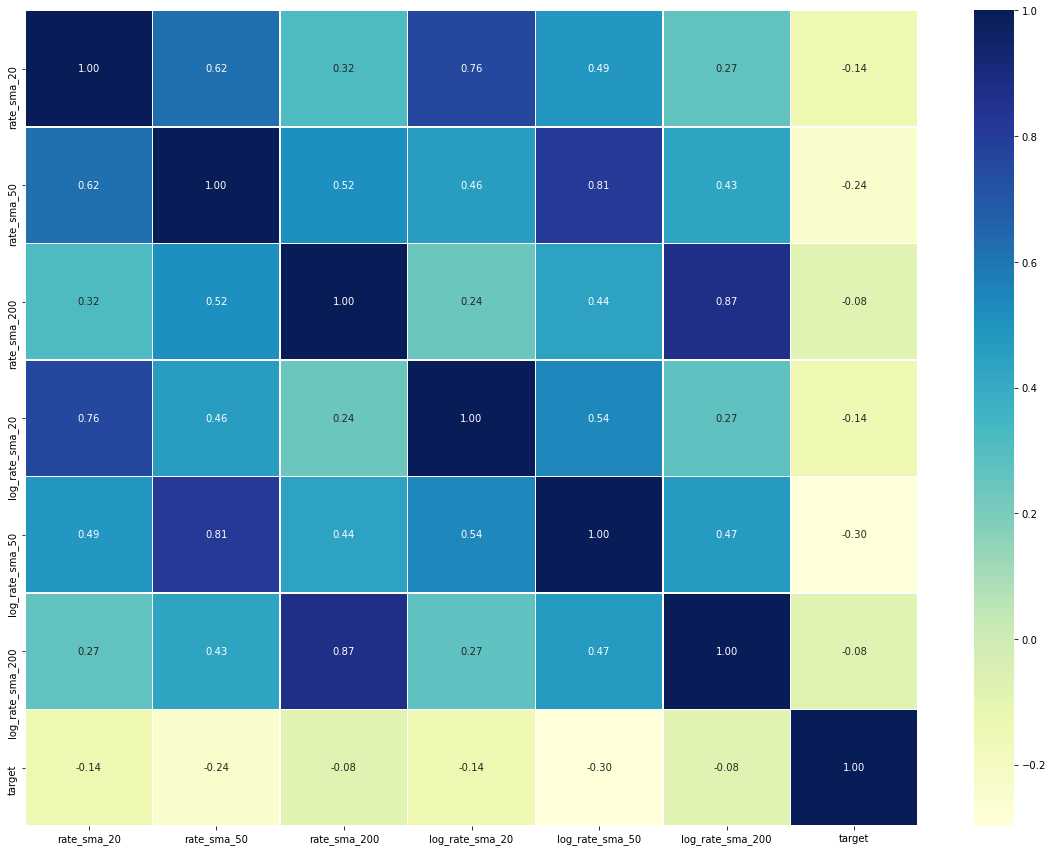

In [73]:
d = dplot[["rate_sma_20", "rate_sma_50", "rate_sma_200", "log_rate_sma_20", "log_rate_sma_50", "log_rate_sma_200","target"]].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## log(sma/close) and sma/close

Not sure which is better, both have correlation matrix of 0.22


In [104]:
dplot = df.copy()
dplot["sma_close_50"] = list(map(lambda sma, c: sma/c, dplot.sma_50, dplot.close))
dplot["log_sma_close_50"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.sma_close_50))

dplot["sma_close_20"] = list(map(lambda sma, c: sma/c, dplot.sma_20, dplot.close))
dplot["log_sma_close_20"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.sma_close_20))

dplot["sma_close_200"] = list(map(lambda sma, c: sma/c, dplot.sma_200, dplot.close))
dplot["log_sma_close_200"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.sma_close_200))

dp = dplot[0:10000]

In [107]:
max(dplot.log_sma_close_200.dropna())

0.688020313099525

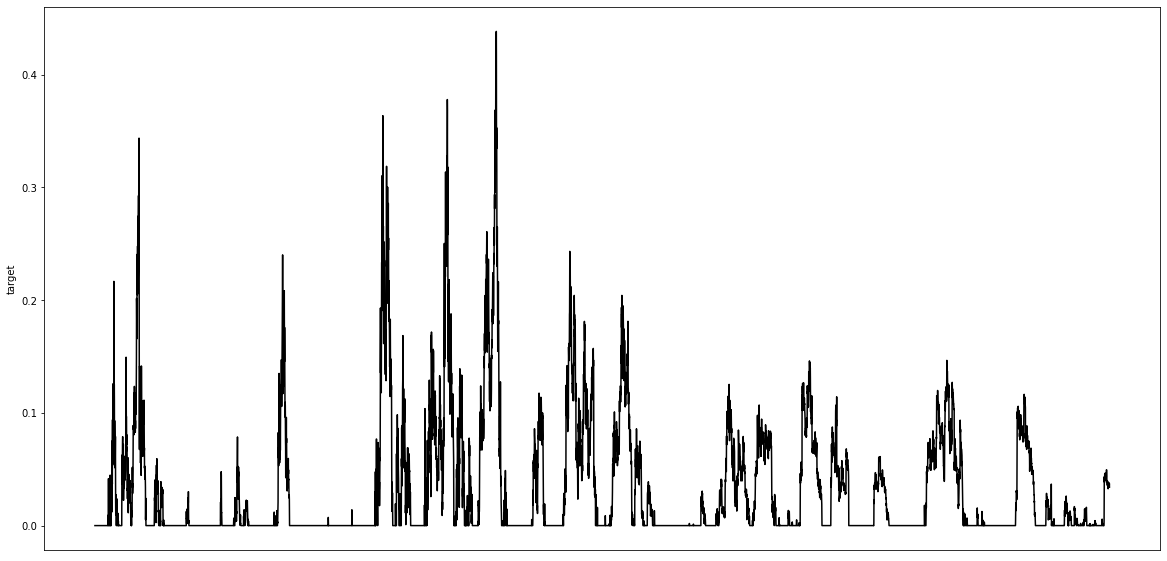

In [109]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(dp.timestamp,
        dp.log_sma_close_200,
        color="black")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

# ax2=ax.twinx()
# ax2.plot(dp.timestamp,
#          dp.close,
#          color="green")
# # ax2.axhline(y=0, color='darkgreen', linestyle='-')
# ax2.set_ylabel("close")

# fig.legend(["a", "b", "c", "d"])
plt.show()

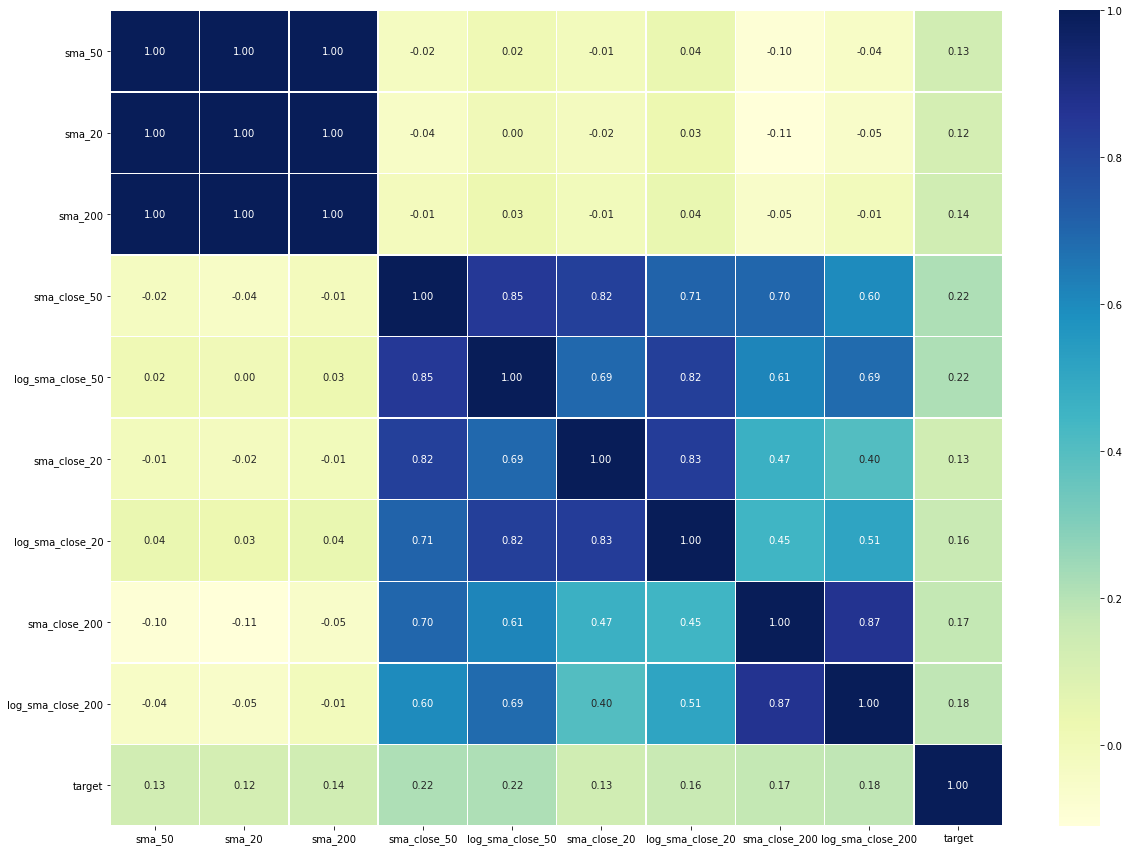

In [108]:
d = dplot[["sma_50", "sma_20", "sma_200", "sma_close_50", "log_sma_close_50", "sma_close_20", "log_sma_close_20","sma_close_200", "log_sma_close_200","target"]].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## sma-diff

In [125]:
dplot = df.copy()
dplot["sma_diff_d_close_50"] = list(map(lambda d, c: d/c, df["sma_diff_50"], df["close"]))
dplot["sma_diff_d_close_20"] = list(map(lambda d, c: d/c, df["sma_diff_20"], df["close"]))
dplot["sma_diff_d_close_200"] = list(map(lambda d, c: d/c, df["sma_diff_200"], df["close"]))

dplot["log_sma_diff_d_close_50"] = list(map(lambda d, c: uf.log_abs(d)/uf.log_abs(c), df["sma_diff_50"], df["close"]))
dplot["log_sma_diff_d_close_20"] = list(map(lambda d, c: uf.log_abs(d)/uf.log_abs(c), df["sma_diff_20"], df["close"]))
dplot["log_sma_diff_d_close_200"] = list(map(lambda d, c: uf.log_abs(d)/uf.log_abs(c), df["sma_diff_200"], df["close"]))

dplot["abs_sma_diff_d_close_50"] = list(map(lambda x: abs(x), dplot["sma_diff_d_close_50"]))

dp = dplot[0:10000]

wanted = list(dplot.columns)[109:]
wanted.append("target")
wanted

['sma_diff_d_close_50',
 'sma_diff_d_close_20',
 'sma_diff_d_close_200',
 'log_sma_diff_d_close_50',
 'log_sma_diff_d_close_20',
 'log_sma_diff_d_close_200',
 'abs_sma_diff_d_close_50',
 'target']

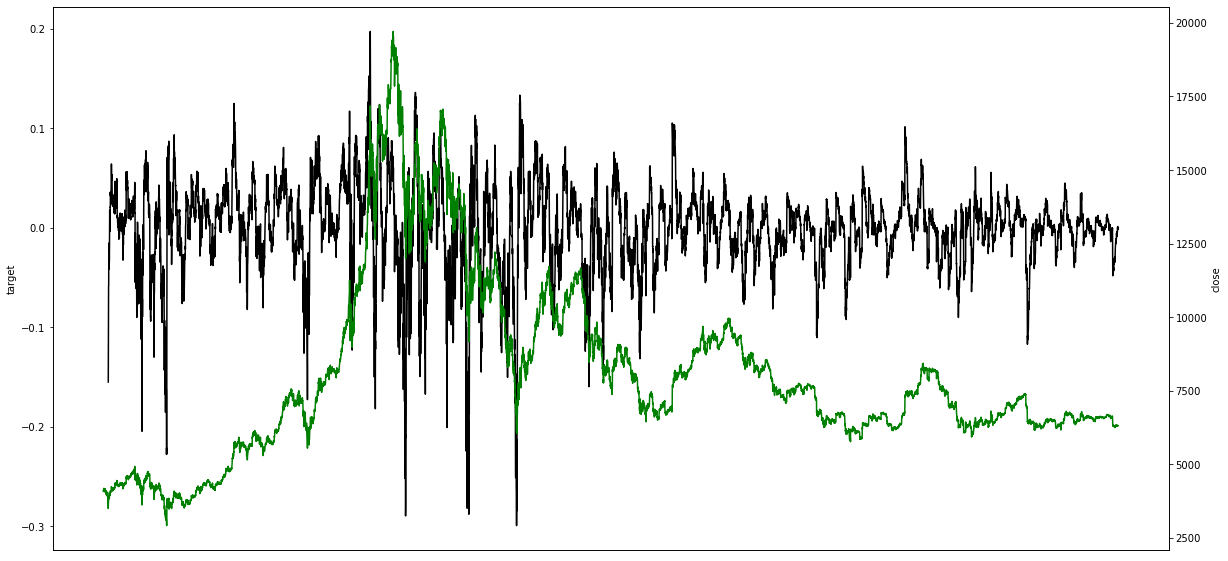

In [122]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(dp.timestamp,
        dp.sma_diff_d_close_50,
        color="black")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax2.plot(dp.timestamp,
         dp.close,
         color="green")
# ax2.axhline(y=0, color='darkgreen', linestyle='-')
ax2.set_ylabel("close")

# fig.legend(["a", "b", "c", "d"])
plt.show()

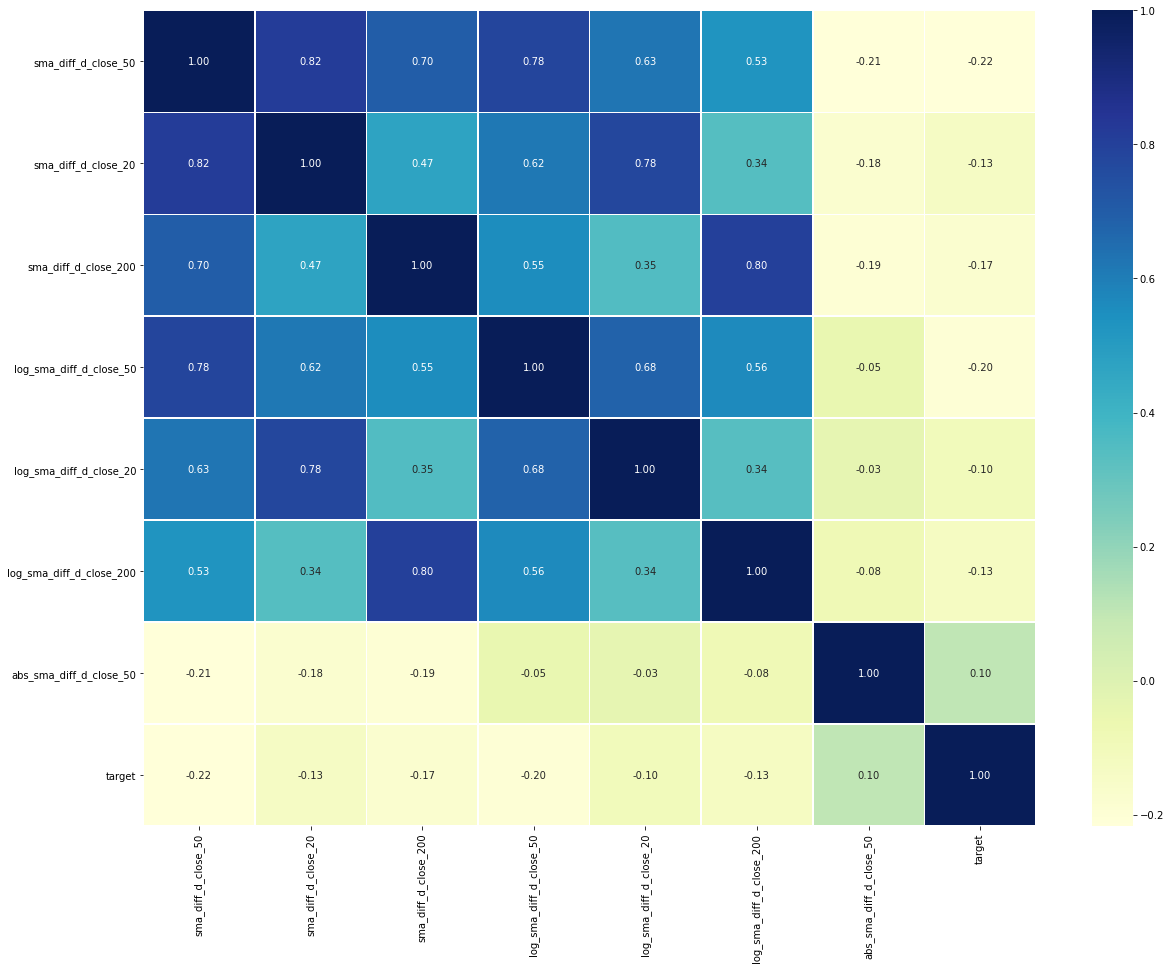

In [126]:
d = dplot[wanted].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Add all sma indicators

In [12]:
wanted = list(df.columns)[94:]
wanted.append("target")
wanted.append("close")

wanted

['sma_20',
 'sma_50',
 'sma_200',
 'sma_diff_20',
 'sma_diff_50',
 'sma_diff_200',
 'rate_sma_20',
 'rate_sma_50',
 'rate_sma_200',
 'target',
 'close']

In [30]:
dplot = df[wanted].copy()
dplot = pd.concat([dplot, df[list(list(df.columns)[11:20])].copy()], axis=1)

In [31]:
dplot

,sma_20,sma_50,sma_200,sma_diff_20,sma_diff_50,sma_diff_200,rate_sma_20,rate_sma_50,rate_sma_200,target,close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4094.62,4.301206e+02,-74.535483,0.127313,20.182216,64.688170,-3.422322e+09,3.071359e+10,0.026986,9.906971e+02
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4093.00,4.300001e+02,-75.344726,0.178126,17.111760,69.133393,-3.390650e+09,3.287783e+10,-0.002855,9.906971e+02
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4117.41,4.311024e+02,-64.601670,0.156695,52.129794,85.855556,1.097238e+10,3.596774e+10,0.063750,9.906971e+02
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4115.41,4.336960e+02,-67.517221,0.201195,43.849666,79.962643,-1.898240e+10,3.671857e+10,0.062654,9.902158e+02
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4155.87,4.475725e+02,-53.381161,0.304989,119.291855,83.517756,1.046366e+10,3.556394e+10,0.137560,9.902158e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,58105.8255,57212.6070,56814.23610,-505.9555,387.2630,785.63390,0.7930,6.5712,16.28380,0,57599.87,3.749967e+06,651846.660352,-0.089334,-838201.384571,55.679210,-1.563057e+10,7.656146e+08,-128.021424,3.397758e+06
32458,58144.4840,57237.1672,56833.50875,236.6560,1143.9728,1547.63125,38.6585,24.5602,19.27265,0,58381.14,3.753507e+06,656586.000023,-0.014589,-189500.628952,57.742937,-3.565743e+09,-1.555239e+08,-69.377476,3.443845e+06
32459,58221.5110,57273.3770,56856.41325,677.4690,1625.6030,2042.56675,77.0270,36.2098,22.90450,0,58898.98,3.756053e+06,660401.391292,0.031060,119822.634432,59.108266,1.348046e+10,4.377286e+08,98.125673,3.474391e+06
32460,58322.9935,57320.2278,56880.89275,737.5765,1740.3422,2179.67725,101.4825,46.8508,24.47950,0,59060.57,3.755790e+06,663338.430698,0.045276,170504.572030,59.602311,5.726022e+09,6.828207e+08,41.900274,3.483923e+06


In [32]:
#log-rate-sma-X and rate-sma-X
dplot["log_rate_sma_50"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.rate_sma_50))
dplot["log_rate_sma_20"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.rate_sma_20))
dplot["log_rate_sma_200"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.rate_sma_200))

# log(sma/close) and sma/close
dplot["sma_close_50"] = list(map(lambda sma, c: sma/c, dplot.sma_50, dplot.close))
dplot["log_sma_close_50"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.sma_close_50))

dplot["sma_close_20"] = list(map(lambda sma, c: sma/c, dplot.sma_20, dplot.close))
dplot["log_sma_close_20"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.sma_close_20))

dplot["sma_close_200"] = list(map(lambda sma, c: sma/c, dplot.sma_200, dplot.close))
dplot["log_sma_close_200"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.sma_close_200))

# sma diff
dplot["sma_diff_d_close_50"] = list(map(lambda d, c: d/c, df["sma_diff_50"], df["close"]))
dplot["sma_diff_d_close_20"] = list(map(lambda d, c: d/c, df["sma_diff_20"], df["close"]))
dplot["sma_diff_d_close_200"] = list(map(lambda d, c: d/c, df["sma_diff_200"], df["close"]))

dplot["log_sma_diff_d_close_50"] = list(map(lambda d, c: uf.log_abs(d)/uf.log_abs(c), df["sma_diff_50"], df["close"]))
dplot["log_sma_diff_d_close_20"] = list(map(lambda d, c: uf.log_abs(d)/uf.log_abs(c), df["sma_diff_20"], df["close"]))
dplot["log_sma_diff_d_close_200"] = list(map(lambda d, c: uf.log_abs(d)/uf.log_abs(c), df["sma_diff_200"], df["close"]))

dplot["abs_sma_diff_d_close_50"] = list(map(lambda x: abs(x), dplot["sma_diff_d_close_50"]))

dp = dplot[0:10000]

In [33]:
dplot

,sma_20,sma_50,sma_200,sma_diff_20,sma_diff_50,sma_diff_200,rate_sma_20,rate_sma_50,rate_sma_200,target,...,log_sma_close_20,sma_close_200,log_sma_close_200,sma_diff_d_close_50,sma_diff_d_close_20,sma_diff_d_close_200,log_sma_diff_d_close_50,log_sma_diff_d_close_20,log_sma_diff_d_close_200,abs_sma_diff_d_close_50
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,58105.8255,57212.6070,56814.23610,-505.9555,387.2630,785.63390,0.7930,6.5712,16.28380,0,...,0.008746,0.986360,0.0,0.006723,-0.008784,0.013640,0.543651,-0.568041,0.608186,0.006723
32458,58144.4840,57237.1672,56833.50875,236.6560,1143.9728,1547.63125,38.6585,24.5602,19.27265,0,...,0.000000,0.973491,0.0,0.019595,0.004054,0.026509,0.641679,0.498108,0.669216,0.019595
32459,58221.5110,57273.3770,56856.41325,677.4690,1625.6030,2042.56675,77.0270,36.2098,22.90450,0,...,0.000000,0.965321,0.0,0.027600,0.011502,0.034679,0.673153,0.593464,0.693942,0.027600
32460,58322.9935,57320.2278,56880.89275,737.5765,1740.3422,2179.67725,101.4825,46.8508,24.47950,0,...,0.000000,0.963094,0.0,0.029467,0.012488,0.036906,0.679194,0.601054,0.699682,0.029467


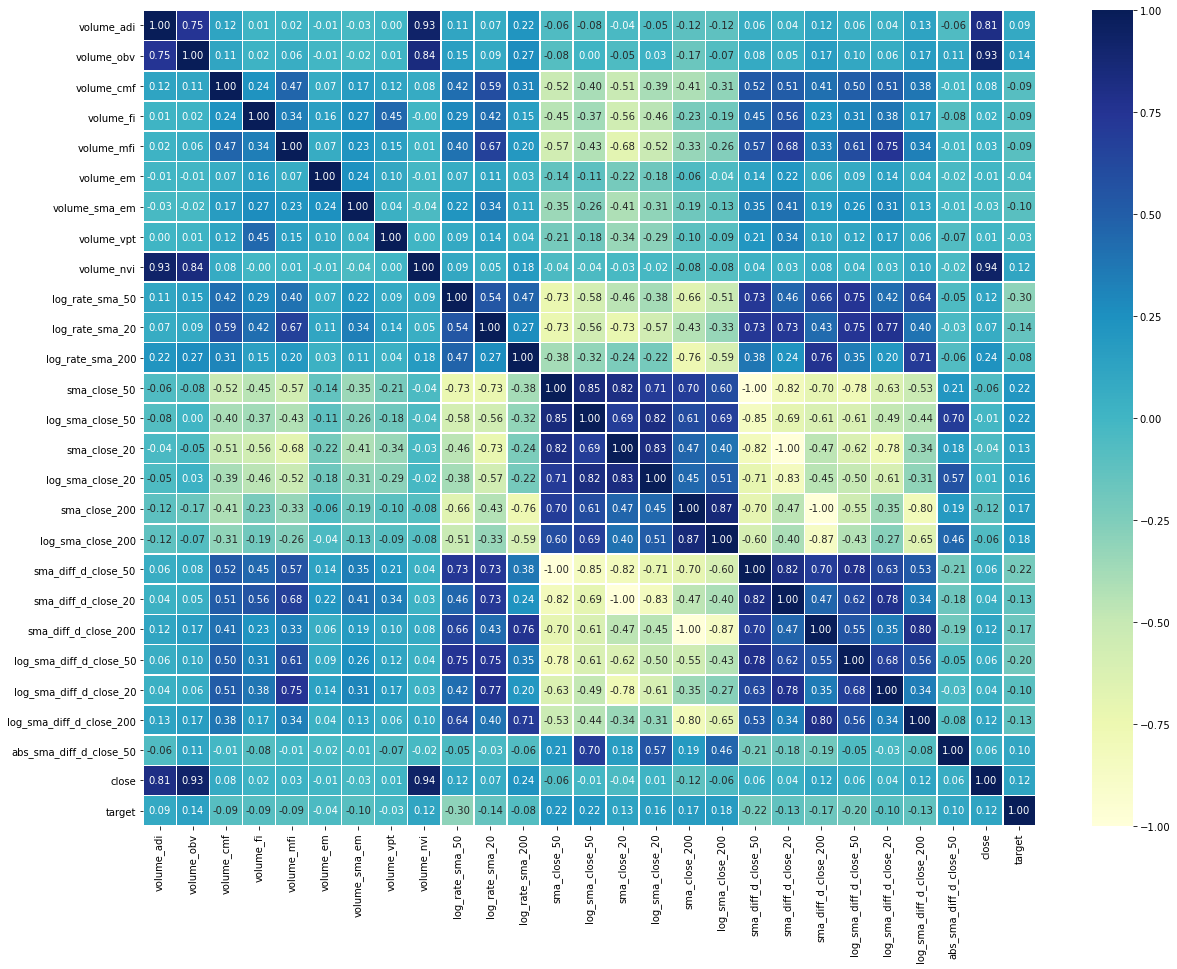

In [34]:
d = dplot.copy().drop(wanted, axis=1)
# d = pd.concat(d, dplot[list(list(df.columns)[11:20])].copy())

d["close"] = dplot["close"]
d["target"] = dplot["target"]
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [35]:
d.to_csv("../data/classification_test.csv", index=False)